In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
mnist = input_data.read_data_sets('MNIST_data/',one_hot=True)

C:\Users\mook\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
x_train = mnist.train.images[:,:]
y_train = mnist.train.labels[:,:]

In [5]:
x_test = mnist.test.images[:,:]
y_test = mnist.test.labels[:,:]

# 모델 튜닝
## sigmoid -> relu
## gradientdecent -> adamoptimizer

In [6]:
X= tf.placeholder(tf.float32, shape=[None,28*28*1])
Y= tf.placeholder(tf.float32, shape=[None,10])


W1 = tf.Variable(tf.random_normal([28*28*1,28*28*1]))
B1 = tf.Variable(tf.random_normal([28*28*1]))
layer1 = tf.nn.relu(tf.matmul(X,W1)+B1)

W2 = tf.Variable(tf.random_normal([28*28*1,28*28*1]))
B2 = tf.Variable(tf.random_normal([28*28*1]))
layer2 = tf.nn.relu(tf.matmul(layer1,W2)+B2)

W3 = tf.Variable(tf.random_normal([28*28*1,10]))
B3 = tf.Variable(tf.random_normal([10]))

logits = tf.matmul(layer2, W3)+B3
hypothesis = tf.nn.softmax(logits)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

###정확도
prediction = tf.argmax(hypothesis,1)
correct_prediction = tf.equal(prediction, tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



# Epoch 15로 큰맘먹고 train해보겠습니다.

In [7]:
training_epoch = 15
batch_size = 100
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for epoch in range(training_epoch):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples/batch_size) #550
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer],feed_dict={X:batch_xs,Y:batch_ys})
        avg_cost += c/total_batch
    print("Epoch :",epoch, 'Cost', avg_cost)

Epoch : 0 Cost 152.67245035437014
Epoch : 1 Cost 23.42020920068028
Epoch : 2 Cost 13.822456403742788
Epoch : 3 Cost 10.525817369157503
Epoch : 4 Cost 8.290842077462864
Epoch : 5 Cost 7.658724964450447
Epoch : 6 Cost 7.352758504009123
Epoch : 7 Cost 6.291375079913888
Epoch : 8 Cost 5.685362662332691
Epoch : 9 Cost 5.440563885794255
Epoch : 10 Cost 4.479049311576313
Epoch : 11 Cost 4.386675490794166
Epoch : 12 Cost 4.23205381603842
Epoch : 13 Cost 3.414061441419821
Epoch : 14 Cost 3.3377187992568667


In [8]:
result = sess.run(accuracy, feed_dict={X:x_test, Y:y_test})
result

0.9717

# 짜잔! 88%에서 97프로로 올랐습니다, 갓루

Lbael: [3]
Lbael: [3]


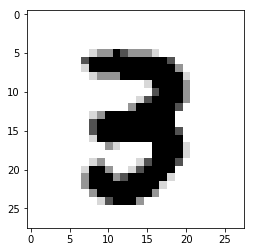

In [9]:
r = random.randint(0,mnist.test.num_examples-1)
print('Lbael:', sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
print('Lbael:', sess.run(tf.argmax(hypothesis,1),feed_dict={X:mnist.test.images[r:r+1]}))
plt.imshow(
mnist.test.images[r:r+1].reshape(28,28),
    cmap='Greys',
    interpolation = 'nearest')